## Retail Giant Sales Forecasting Assignment

### Problem Statement-1: Data Preparation

Global Mart is an online supergiant store that has worldwide operations. This store takes orders and delivers across the globe and deals with all the major product categories — consumer, corporate and home office.

As a sales manager for this store, we have to forecast the sales of the products for the next 6 months, so that we have a proper estimate and can plan the inventory and business processes accordingly.

The store dataset has the following 5 attributes and the data description is as given below:
- Order-Date: The date on which the order was placed
- Segment: The segment to which the product belongs
- Market: The market to which the customer belongs
- Sales: Total sales value of the transaction
- Profit: Profit made on the transaction

The store caters to 7 different geographical market segments (Africa, APAC (Asia Pacific), Canada, EMEA(Middle East), EU (European Union), LATAM (Latin America), United States) and 3 major customer segments (Consumer, Corporate, Home Office). Based on these, there are 21 unique "Market-Segments" for which the sales forecasts can be made.

Due to certain unpredictable circumstances in the market, as a company, we are prioritizing only the best and most consistent market segment in terms of profitability. We want to see which market segment is the most consistently profitable. And then forecast the sales for that market-segment only.

### Problem Statement-2: Model Building and Evaluation

After we arrive at the most profitable market segment, the next challenge is to forecast the sales for the next 6 months (test data) for that market segment. For forecasting this, we need to check which time series model will work the best. We will apply all the techniques in the Smoothing methods and the ARIMA set of methods to decide.

We plot the sales for the concerned market segment, observe the plot and decompose the data into the trend, seasonal and residual components. Based on these insights, we conclude which method would suit best from the smoothing technique and which method will work best for predicting the sales using the ARIMA set of techniques. Obviously this depends on whether there is any seasonality or trend.

After checking this, we will apply all the models in the smoothing techniques and ARIMA set of techniques (except ARIMAX and SARIMAX) and forecast the sales for the next 6 months. We will compare their forecast plots and also find their MAPE values and keep comparing them by adding them in the same table.

### Importing required Libraries and packages

In [36]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


### Importing the data and performing basic operations to understand the data

In [37]:
df = pd.read_csv('Global+Superstore+Data.csv') ## Data Import
df.head()

,Order Date,Segment,Market,Sales,Profit
0,31-07-2012,Consumer,US,2309.650,762.1845
1,05-02-2013,Corporate,APAC,3709.395,-288.7650
2,17-10-2013,Consumer,APAC,5175.171,919.9710
3,28-01-2013,Home Office,EU,2892.510,-96.5400
4,05-11-2013,Consumer,Africa,2832.960,311.5200


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Order Date  51290 non-null  object 
 1   Segment     51290 non-null  object 
 2   Market      51290 non-null  object 
 3   Sales       51290 non-null  float64
 4   Profit      51290 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.0+ MB


In [39]:
df.describe()

,Sales,Profit
count,51290.000000,51290.000000
mean,246.490581,28.610982
std,487.565361,174.340972
min,0.444000,-6599.978000
25%,30.758625,0.000000
50%,85.053000,9.240000
75%,251.053200,36.810000
max,22638.480000,8399.976000


### Preparing data for the further analysis

In [40]:
## Creating new column named Market_Segment
df['Market_Segment'] = df['Market'] + '_' + df['Segment']
df.head()

,Order Date,Segment,Market,Sales,Profit,Market_Segment
0,31-07-2012,Consumer,US,2309.650,762.1845,US_Consumer
1,05-02-2013,Corporate,APAC,3709.395,-288.7650,APAC_Corporate
2,17-10-2013,Consumer,APAC,5175.171,919.9710,APAC_Consumer
3,28-01-2013,Home Office,EU,2892.510,-96.5400,EU_Home Office
4,05-11-2013,Consumer,Africa,2832.960,311.5200,Africa_Consumer


APAC      11002
LATAM     10294
EU        10000
US         9994
EMEA       5029
Africa     4587
Canada      384
Name: Market, dtype: int64


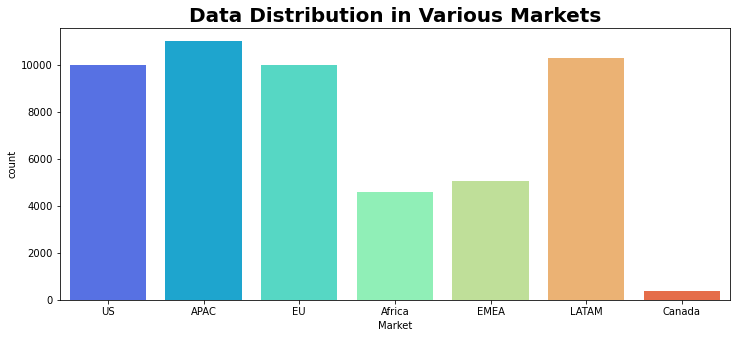

In [41]:
# Developing the Plot to visualize the spread of data in each market
plt.figure(figsize=(12,5))
print(df.Market.value_counts())
sns.countplot(df['Market'], palette='rainbow')
plt.title('Data Distribution in Various Markets', fontweight = 'bold', size=20)
plt.show()

APAC      11002
LATAM     10294
EU        10000
US         9994
EMEA       5029
Africa     4587
Canada      384
Name: Market, dtype: int64


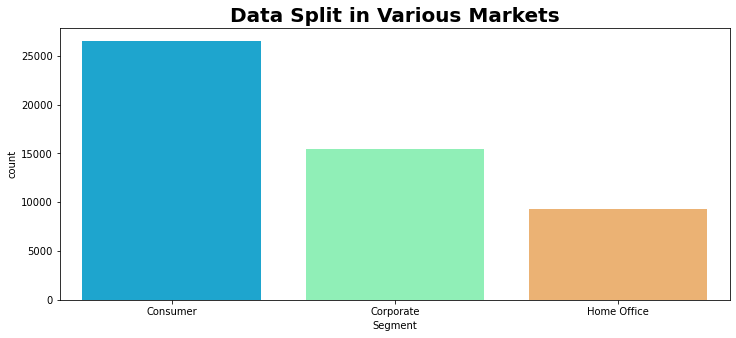

In [42]:
# A Plot to visualize the spread of data in each segment
plt.figure(figsize=(12,5))
print(df.Market.value_counts())
sns.countplot(df['Segment'], palette='rainbow')
plt.title('Data Split in Various Markets', fontweight = 'bold', size = 20)
plt.show()

APAC      11002
LATAM     10294
EU        10000
US         9994
EMEA       5029
Africa     4587
Canada      384
Name: Market, dtype: int64


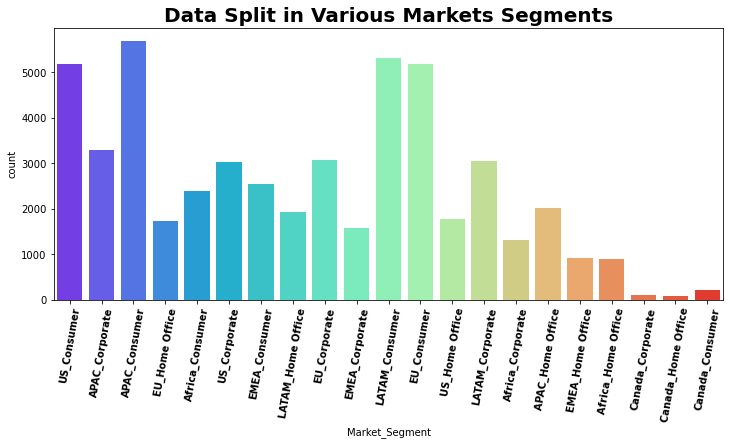

In [43]:
# A Plot to visualize the spread of data in each market_segment
plt.figure(figsize = (12,5))
print(df.Market.value_counts())
sns.countplot(df['Market_Segment'], palette='rainbow')
plt.title('Data Split in Various Markets Segments', fontweight = 'bold', size = 20)
plt.xticks(rotation = 80, fontweight = "bold")
plt.show()

### Here is it very much visible that the plot APAC_Consumer has the highest count

### Now as we are interested in the most Profitable markets and segments, let's analyse more deeper and check the profit and sales in each market

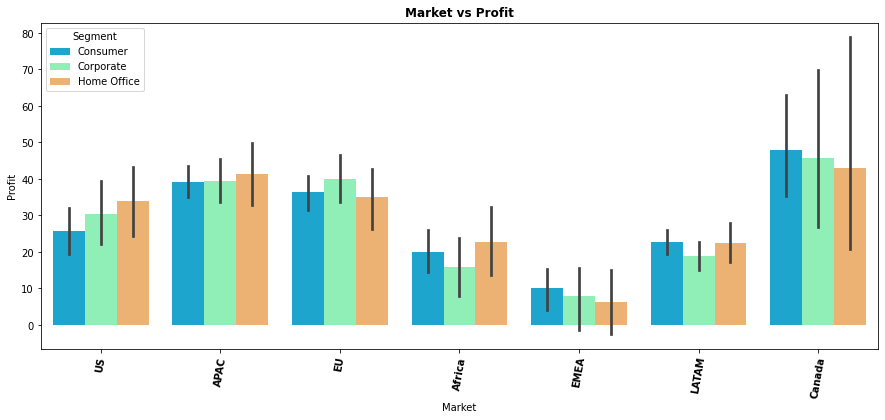

In [44]:
# Plot to show Market vs Profit (Segment-wise)
plt.figure(figsize = (15,6))
sns.barplot(x = 'Market', y = 'Profit', hue = 'Segment', data = df, palette='rainbow')
plt.title('Market vs Profit', fontweight = 'bold')
plt.xticks(rotation = 80, fontweight = "bold")
plt.show()

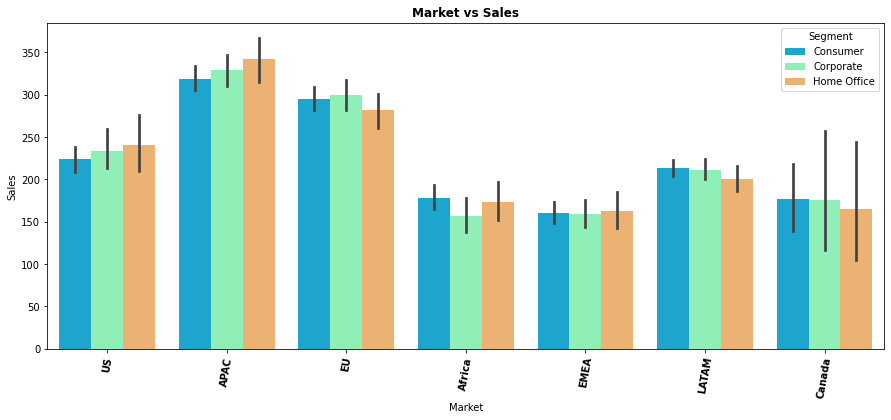

In [45]:
# Plot to show Market vs Sales (Segment-wise)
plt.figure(figsize = (15,6))
sns.barplot(x = 'Market', y = 'Sales', hue = 'Segment', data = df, palette='rainbow')
plt.title('Market vs Sales', fontweight = 'bold')
plt.xticks(rotation = 80, fontweight = "bold")
plt.show()

In [46]:
# Dropping the columns of Market and Segment
df = df.drop(["Market", "Segment"], axis = 1)
df.head()

,Order Date,Sales,Profit,Market_Segment
0,31-07-2012,2309.650,762.1845,US_Consumer
1,05-02-2013,3709.395,-288.7650,APAC_Corporate
2,17-10-2013,5175.171,919.9710,APAC_Consumer
3,28-01-2013,2892.510,-96.5400,EU_Home Office
4,05-11-2013,2832.960,311.5200,Africa_Consumer


In [47]:
##Converting the "Order Date" into a datetime format (Month-year) format
df['Order Date'] = pd.to_datetime(df['Order Date']).dt.to_period('m')
df = df.sort_values(by=['Order Date'])
df.head()

,Order Date,Sales,Profit,Market_Segment
15262,2011-01,139.65,15.30,EU_Corporate
26744,2011-01,88.44,15.84,EU_Consumer
48614,2011-01,11.43,4.11,EU_Corporate
9417,2011-01,491.00,122.70,LATAM_Consumer
48590,2011-01,4.71,0.00,US_Home Office


In [48]:
# Transaction data, aggregated month-wise
df_profit = df.pivot_table(index='Order Date', values='Profit', columns='Market_Segment', aggfunc='sum')
df_profit.head()

Market_Segment,APAC_Consumer,APAC_Corporate,APAC_Home Office,Africa_Consumer,Africa_Corporate,Africa_Home Office,Canada_Consumer,Canada_Corporate,Canada_Home Office,EMEA_Consumer,...,EMEA_Home Office,EU_Consumer,EU_Corporate,EU_Home Office,LATAM_Consumer,LATAM_Corporate,LATAM_Home Office,US_Consumer,US_Corporate,US_Home Office
Order Date,,,,,,,,,,,,,,,,,,,,,
2011-01,2254.4898,-173.7264,230.2656,265.539,520.026,391.515,447.33,12.57,NaN,-2952.594,...,392.526,2259.8670,841.3875,2534.568,540.44312,1021.05924,-26.59744,2465.8368,643.3689,1233.9329
2011-02,4627.8531,3600.7776,617.5407,-201.888,-31.689,825.606,26.43,9.24,87.99,464.160,...,368.070,-783.9945,2234.4060,162.255,1227.86616,814.03020,-356.80440,1853.5541,421.9256,553.9467
2011-03,2337.8319,3634.9365,205.1052,919.074,244.437,83.430,82.47,NaN,84.03,706.380,...,-15.570,1273.7100,2206.5960,269.745,2427.39612,178.66400,769.88400,204.2007,127.4696,-268.9314
2011-04,633.6423,90.7521,603.8478,381.315,941.751,417.618,55.08,6.51,NaN,121.353,...,-456.510,2980.0065,981.1470,130.371,1368.82948,872.64068,-554.22952,1434.8636,494.7315,2723.4358
2011-05,3838.9500,1028.4489,102.0315,-39.981,490.650,39.180,0.87,NaN,NaN,172.554,...,-33.591,673.0080,1719.0600,443.310,1749.39200,134.87252,-397.95600,833.9433,2912.7976,145.7781


In [49]:
df_profit.shape

(48, 21)

In [50]:
df_profit.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 48 entries, 2011-01 to 2014-12
Freq: M
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   APAC_Consumer       48 non-null     float64
 1   APAC_Corporate      48 non-null     float64
 2   APAC_Home Office    48 non-null     float64
 3   Africa_Consumer     48 non-null     float64
 4   Africa_Corporate    48 non-null     float64
 5   Africa_Home Office  48 non-null     float64
 6   Canada_Consumer     43 non-null     float64
 7   Canada_Corporate    40 non-null     float64
 8   Canada_Home Office  28 non-null     float64
 9   EMEA_Consumer       48 non-null     float64
 10  EMEA_Corporate      48 non-null     float64
 11  EMEA_Home Office    47 non-null     float64
 12  EU_Consumer         48 non-null     float64
 13  EU_Corporate        48 non-null     float64
 14  EU_Home Office      48 non-null     float64
 15  LATAM_Consumer      48 non-null     flo

In [51]:
df_profit.describe()

Market_Segment,APAC_Consumer,APAC_Corporate,APAC_Home Office,Africa_Consumer,Africa_Corporate,Africa_Home Office,Canada_Consumer,Canada_Corporate,Canada_Home Office,EMEA_Consumer,...,EMEA_Home Office,EU_Consumer,EU_Corporate,EU_Home Office,LATAM_Consumer,LATAM_Corporate,LATAM_Home Office,US_Consumer,US_Corporate,US_Home Office
count,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,43.000000,40.000000,28.000000,48.000000,...,47.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
mean,4642.032508,2702.859058,1738.442787,995.252062,430.978437,425.261813,225.062791,125.911500,110.829643,531.928625,...,124.814106,3930.993906,2570.707906,1265.584469,2513.186082,1205.737945,898.648620,2794.150192,1916.231958,1256.222469
std,2657.324300,1419.780531,1739.190509,1243.602338,807.742556,813.409283,279.327858,235.548551,264.626754,1134.468729,...,668.668203,2303.420697,1868.534579,1262.305878,1733.020599,997.024908,937.227047,2642.175995,1869.431182,1317.980515
min,262.244700,-173.726400,-2846.224500,-1485.021000,-712.866000,-1445.550000,0.870000,0.240000,0.000000,-2952.594000,...,-2114.334000,-783.994500,-947.035500,-2046.046500,-323.287160,-523.865680,-2481.398680,-2620.836500,-2397.378900,-1705.256800
25%,2804.190375,1774.218750,609.257475,170.993250,-179.468250,-0.999750,30.255000,10.500000,10.200000,23.336250,...,-231.396000,2265.543375,1217.807625,458.382750,1184.253300,365.386990,352.461100,1304.631950,683.973250,483.880975
50%,4459.453350,2509.021050,1406.954850,946.701000,341.239500,404.566500,84.090000,46.110000,30.720000,395.185500,...,30.870000,3702.597000,2224.686000,1275.149250,2380.444160,1093.565160,981.308480,2417.060600,1924.238050,1076.072900
75%,5706.678250,3671.554800,2818.245675,1537.296000,837.259500,814.968000,332.295000,105.067500,91.102500,1053.308250,...,407.820000,5536.927125,3881.872500,1859.827125,3613.893910,1847.249380,1432.611060,4224.628375,2841.443425,2114.575450
max,13773.499500,5881.093200,7389.188100,5530.560000,3350.991000,2230.371000,1121.220000,1196.400000,1392.810000,3415.698000,...,1656.462000,10350.213000,8370.225000,4116.442500,6894.627520,3778.776920,2791.452400,9977.971000,9230.261000,4882.353600


#### Test-Train Split

In [52]:
# The data will be split taking 42 months as the train and 6 months as the test data.
train_len = 42
train = df_profit[0:train_len] # first 42 months as training set
test = df_profit[train_len:] # last 6 months as test set

#### Calculating the "Coefficient of Variation (CoV)" on the profit for each market segment of train data.

- We compare the variance between the segments using CoV which will normalise the standard deviation with the mean and using which one can identify the most profitable market segment.
- The task is to forecast the sales where the market segment is having least variation in the profits.

In [53]:
# Creating a dataframe for CoV

mean = np.mean(train)
stdev = np.std(train)

CoV_df = pd.DataFrame(mean)
CoV_df['stdev'] = stdev
CoV_df['CoV'] = stdev/mean
CoV_df = CoV_df.reset_index()
CoV_df.columns = ['Market_Segment', 'Mean', 'Stdev', 'CoV']
CoV_df.sort_values (by='CoV', ascending = True, inplace = True)
CoV_df

,Market_Segment,Mean,Stdev,CoV
0,APAC_Consumer,4400.894243,2300.457687,0.522725
1,APAC_Corporate,2574.919807,1364.837734,0.530051
12,EU_Consumer,3699.977143,2202.282289,0.595215
15,LATAM_Consumer,2295.555697,1569.632686,0.683770
13,EU_Corporate,2216.299429,1600.336696,0.722076
16,LATAM_Corporate,1122.633016,990.360880,0.882177
14,EU_Home Office,1224.456536,1148.627937,0.938072
2,APAC_Home Office,1511.088314,1523.508658,1.008219
18,US_Consumer,2686.740912,2715.031412,1.010530
19,US_Corporate,1754.199083,1880.200775,1.071829


In [54]:
Lowest_CoV_value = min(CoV_df["CoV"])
Lowest_CoV_value

0.5227250555218103

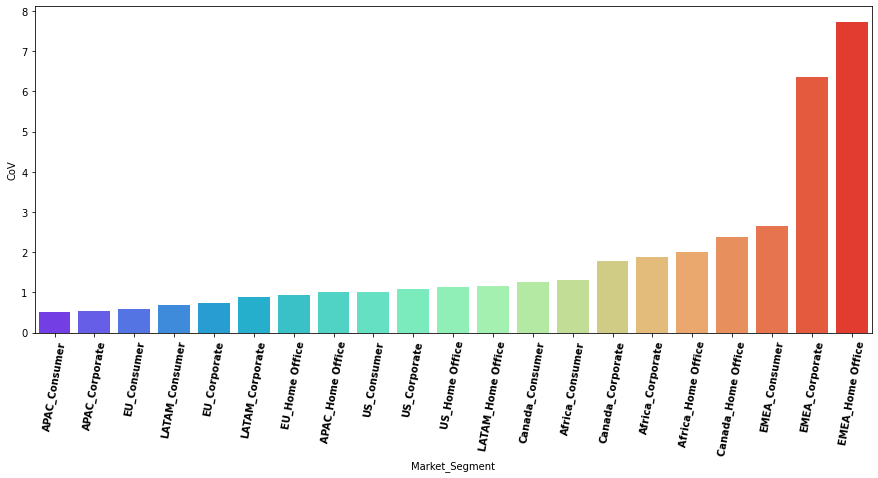

In [55]:
plt.figure(figsize = (15,6))
sns.barplot(x = 'Market_Segment', y = 'CoV', data = CoV_df, palette='rainbow')
plt.xticks(rotation = 80,fontweight = "bold")
plt.show()

### Observation: Lowest CoV is 0.5227 for APAC_Consumer (Market Segment). So, APAC_Consumer is the Market_Segment with maximum profitability. We will proceed with the analysis and predict the sales for this segment for the next 6 months.

In [56]:
# Changing date format into timestamps
df['Order Date'] = df['Order Date'].astype(str)
df['Order Date'] = pd.to_datetime(df['Order Date'])
df.head()

,Order Date,Sales,Profit,Market_Segment
15262,2011-01-01,139.65,15.30,EU_Corporate
26744,2011-01-01,88.44,15.84,EU_Consumer
48614,2011-01-01,11.43,4.11,EU_Corporate
9417,2011-01-01,491.00,122.70,LATAM_Consumer
48590,2011-01-01,4.71,0.00,US_Home Office


#### Filtering the data for the best Market Segment, namely, APAC Consumer

In [57]:
# Dropping the data of 20 other market segments and keeping only "APAC Consumer"
retailData = df[(df.Market_Segment == "APAC_Consumer")]
retailData.head()

,Order Date,Sales,Profit,Market_Segment
1080,2011-01-01,1429.050,371.490,APAC_Consumer
9203,2011-01-01,219.780,59.340,APAC_Consumer
19331,2011-01-01,342.510,54.600,APAC_Consumer
26270,2011-01-01,102.762,1.842,APAC_Consumer
14830,2011-01-01,420.420,147.000,APAC_Consumer


In [58]:
retailData.shape

(5699, 4)

In [59]:
retailData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5699 entries, 1080 to 21163
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Order Date      5699 non-null   datetime64[ns]
 1   Sales           5699 non-null   float64       
 2   Profit          5699 non-null   float64       
 3   Market_Segment  5699 non-null   object        
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 222.6+ KB


In [60]:
retailData.describe()

,Sales,Profit
count,5699.000000,5699.000000
mean,318.784646,39.097659
std,540.272454,164.472190
min,2.880000,-2380.350000
25%,46.542600,-2.877600
50%,121.920000,10.800000
75%,341.898300,46.800000
max,5759.964000,2817.990000


In [61]:
retailData = pd.DataFrame(retailData.groupby("Order Date")['Sales'].sum())
retailData.head()

,Sales
Order Date,
2011-01-01,18821.9898
2011-02-01,23313.3531
2011-03-01,26518.4919
2011-04-01,12046.0923
2011-05-01,25941.9000


In [62]:
retailData.shape

(48, 1)

## Time series analysis

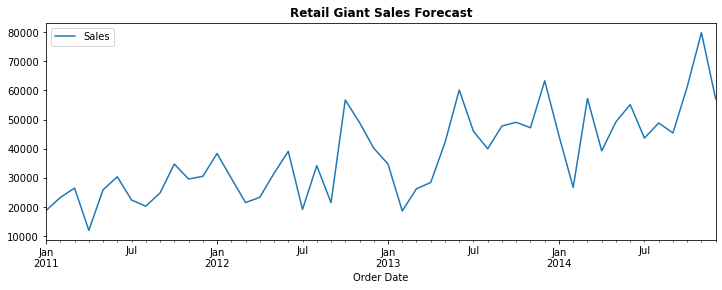

In [63]:
retailData.plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('Retail Giant Sales Forecast', fontweight = 'bold')
plt.show(block=False)

In [64]:
# Checking for missing values
retailData.isnull().sum()

Sales    0
dtype: int64

#### Observation: There are no missing values

#### Splitting the time series data into train and test set

In [65]:
# The time series data will be split taking 42 months as the train and 6 months as the test data.
train_len = 42
train = retailData[0:train_len] # first 42 months as training set
test = retailData[train_len:] # last 6 months as out-of-time test set

#### Time Series Decomposition

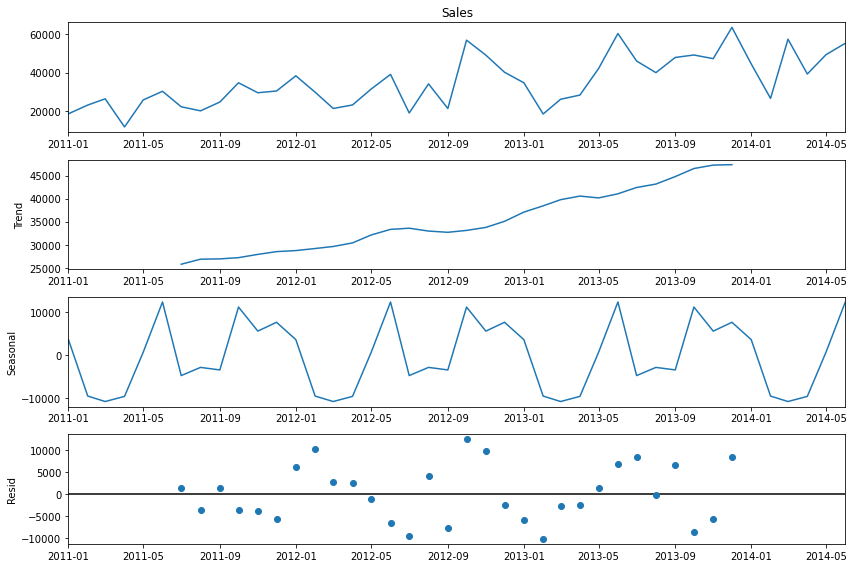

In [66]:
# Time series being split into its various components that is the Trend, Seasonality, and residuals
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 12, 8
decomposition = sm.tsa.seasonal_decompose(train.Sales, model = 'additive') # additive seasonal index
fig = decomposition.plot()
plt.show()

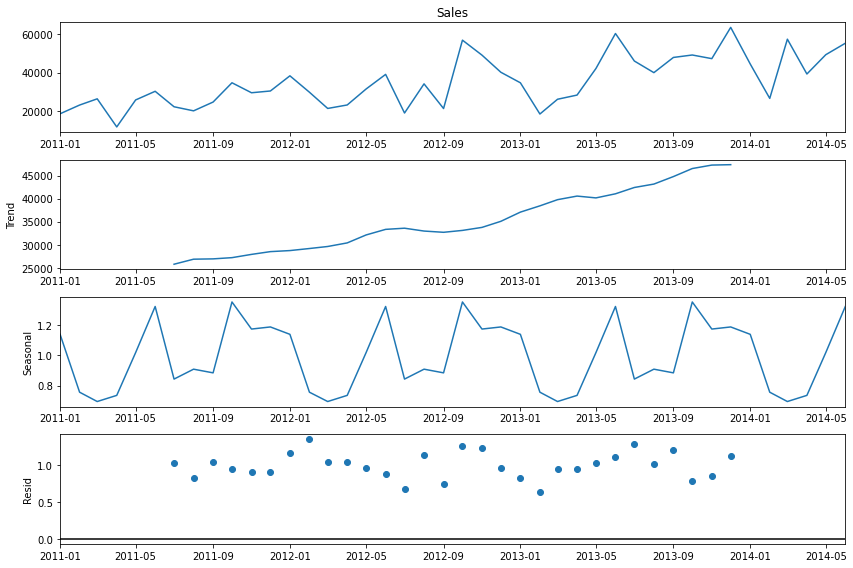

In [67]:
# Time series being split into its various components that is the Trend, Seasonality, and residuals
from pylab import rcParams
import statsmodels.api as sm
rcParams['figure.figsize'] = 12, 8
decomposition = sm.tsa.seasonal_decompose(train.Sales, model='multiplicative') # additive seasonal index
fig = decomposition.plot()
plt.show()

### Building a time series forecast using various algorithms

#### Naive Method

In [68]:
# Last observation in data
y_hat_naive = test.copy()
y_hat_naive['naive_forecast'] = train['Sales'][train_len-1]

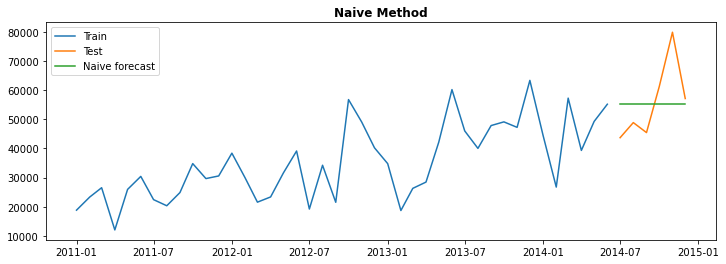

In [69]:
# Plot train, test and forecast
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_naive['naive_forecast'], label='Naive forecast')
plt.legend(loc='best')
plt.title('Naive Method', fontweight= 'bold')
plt.show()

In [70]:
# Calculate the RMSE and MAPE
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_naive['naive_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_naive['naive_forecast'])/test['Sales'])*100,2)
results = pd.DataFrame({'Method':['Naive method'], 'MAPE': [mape], 'RMSE': [rmse]})
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47


#### Simple average method

In [71]:
# Average of past months sales
y_hat_avg = test.copy()
y_hat_avg['avg_forecast'] = train['Sales'].mean()

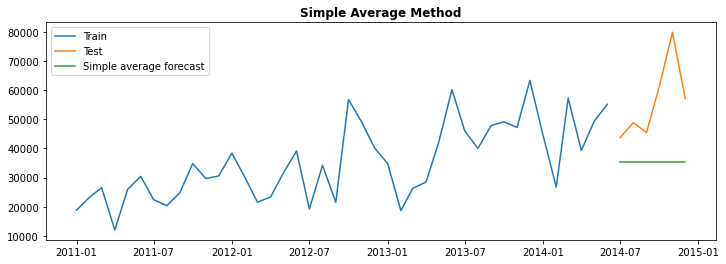

In [72]:
# Plot train, test and forecast
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Simple average forecast')
plt.legend(loc='best')
plt.title('Simple Average Method', fontweight='bold')
plt.show()

In [73]:
# Calculate RMSE and MAPE
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_avg['avg_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_avg['avg_forecast'])/test['Sales'])*100,2)
tempResults = pd.DataFrame({'Method':['Simple average method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47
0,Simple average method,24146.06,34.34


#### Simple moving average method

In [74]:
# In this method, a rolling average of 3 months sales is considered
y_hat_sma = retailData.copy()
ma_window = 3
y_hat_sma['sma_forecast'] = retailData['Sales'].rolling(ma_window).mean()
y_hat_sma['sma_forecast'][train_len:] = y_hat_sma['sma_forecast'][train_len-1]

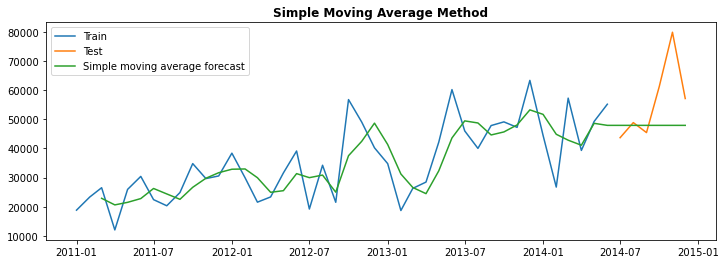

In [75]:
# Plot train, test and forecast
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_sma['sma_forecast'], label='Simple moving average forecast')
plt.legend(loc='best')
plt.title('Simple Moving Average Method', fontweight= 'bold')
plt.show()

In [76]:
# Calculate RMSE and MAPE
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_sma['sma_forecast'][train_len:])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_sma['sma_forecast'][train_len:])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple moving average forecast'], 'RMSE': [rmse],'MAPE': [mape]})
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47
0,Simple average method,24146.06,34.34
0,Simple moving average forecast,14756.73,15.82


### Exponential smoothing methods

#### Simple exponential smoothing

In [77]:
# The most recent period's data multiplied by the smoothing factor
# This model captures the level of the time series

from statsmodels.tsa.holtwinters import SimpleExpSmoothing
model = SimpleExpSmoothing(train['Sales'])
model_fit = model.fit(optimized=True)
model_fit.params
y_hat_ses = test.copy()
y_hat_ses['ses_forecast'] = model_fit.forecast(6)

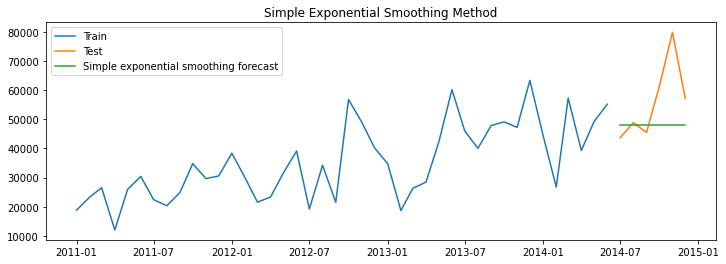

In [78]:
# Plot train, test and forecast
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_ses['ses_forecast'], label='Simple exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Simple Exponential Smoothing Method')
plt.show()

In [79]:
# Calculate RMSE and MAPE
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_ses['ses_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_ses['ses_forecast'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Simple exponential smoothing forecast'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47
0,Simple average method,24146.06,34.34
0,Simple moving average forecast,14756.73,15.82
0,Simple exponential smoothing forecast,14627.34,15.74


#### Holt's Exponential Smoothing

In [80]:
# This model captures both level and trend of a time series
from statsmodels.tsa.holtwinters import ExponentialSmoothing
model = ExponentialSmoothing(np.asarray(train['Sales']) ,seasonal_periods=12 ,trend='additive', seasonal=None)
model_fit = model.fit(smoothing_level=0.2, smoothing_slope=0.01, optimized=False)
print(model_fit.params)
y_hat_holt = test.copy()
y_hat_holt['holt_forecast'] = model_fit.forecast(len(test))

{'smoothing_level': 0.2, 'smoothing_trend': 0.01, 'smoothing_seasonal': None, 'damping_trend': nan, 'initial_level': 18821.9898, 'initial_trend': 4491.363300000001, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


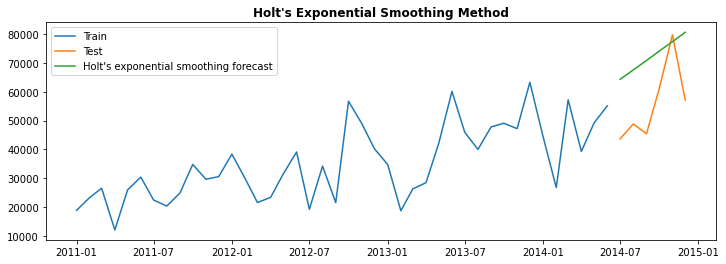

In [81]:
# Plot train, test and forecast
plt.figure(figsize=(12,4))
plt.plot( train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_holt['holt_forecast'], label='Holt\'s exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Holt\'s Exponential Smoothing Method', fontweight='bold')
plt.show()

In [82]:
# Calculate RMSE and MAPE
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_holt['holt_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_holt['holt_forecast'])/test['Sales'])*100,2)

tempResults = pd.DataFrame({'Method':['Holt\'s exponential smoothing method'], 'RMSE': [rmse],'MAPE': [mape] })
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47
0,Simple average method,24146.06,34.34
0,Simple moving average forecast,14756.73,15.82
0,Simple exponential smoothing forecast,14627.34,15.74
0,Holt's exponential smoothing method,18976.37,34.57


#### Holt Winters' additive method with trend and seasonality

In [83]:
# This model captures level, trend and seasonality of a time series
y_hat_hwa = test.copy()
model = ExponentialSmoothing(np.asarray(train['Sales']) ,seasonal_periods=12 ,trend='add', seasonal='add')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwa['hw_forecast'] = model_fit.forecast(6)

{'smoothing_level': 0.07571428571428572, 'smoothing_trend': 0.010816326530612248, 'smoothing_seasonal': 0.1026984126984127, 'damping_trend': nan, 'initial_level': 34110.965325000005, 'initial_trend': 730.4167145833334, 'initial_seasons': array([-15288.975525, -10797.612225,  -7592.473425, -22064.873025,
        -8169.065325,  -3712.033725, -11679.370425, -13779.891825,
        -9250.570425,    676.322775,  -4462.610625,  -3556.103925]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


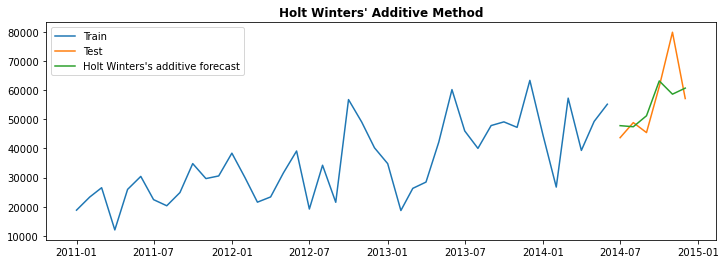

In [84]:
# Plot train, test and forecast
plt.figure(figsize=(12,4))
plt.plot( train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_hwa['hw_forecast'], label='Holt Winters\'s additive forecast')
plt.legend(loc='best')
plt.title('Holt Winters\' Additive Method', fontweight='bold')
plt.show()

In [427]:
# Calculate RMSE and MAPE
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_hwa['hw_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_hwa['hw_forecast'])/test['Sales'])*100,2)
tempResults = pd.DataFrame({'Method':['Holt Winters\' additive method'], 'RMSE': [rmse],'MAPE': [mape]})
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47
0,Simple average method,24146.06,34.34
0,Simple moving average forecast,14756.73,15.82
0,Simple exponential smoothing forecast,14627.34,15.74
0,Holt's exponential smoothing method,18976.37,34.57
0,Holt Winters' additive method,9306.82,10.17


#### Holt Winter's multiplicative method with trend and seasonality

In [428]:
# This model captures level, trend and seasonality of a time series
y_hat_hwm = test.copy()
model = ExponentialSmoothing(np.asarray(train['Sales']) ,seasonal_periods=12 ,trend='add', seasonal='mul')
model_fit = model.fit(optimized=True)
print(model_fit.params)
y_hat_hwm['hw_forecast'] = model_fit.forecast(6)

{'smoothing_level': 0.040357142857142855, 'smoothing_trend': 0.0001, 'smoothing_seasonal': 0.13709183673469388, 'damping_trend': nan, 'initial_level': 34110.965325000005, 'initial_trend': 730.4167145833334, 'initial_seasons': array([0.55178708, 0.68345627, 0.77741839, 0.35314428, 0.76051498,
       0.8911777 , 0.65760657, 0.5960275 , 0.72880948, 1.01982714,
       0.86917372, 0.89574895]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


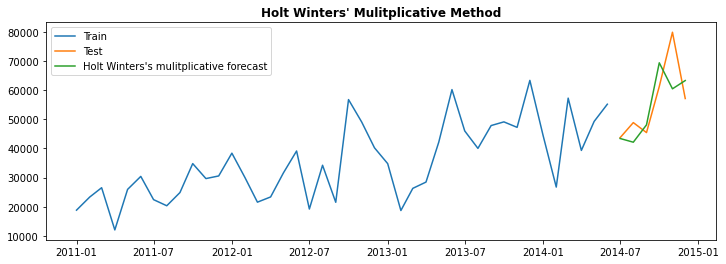

In [429]:
# Plot train, test and forecast
plt.figure(figsize=(12,4))
plt.plot( train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_hwm['hw_forecast'], label='Holt Winters\'s mulitplicative forecast')
plt.legend(loc='best')
plt.title('Holt Winters\' Mulitplicative Method', fontweight='bold')
plt.show()

In [430]:
# Calculate RMSE and MAPE
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_hwm['hw_forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_hwm['hw_forecast'])/test['Sales'])*100,2)
tempResults = pd.DataFrame({'Method':['Holt Winters\' multiplicative method'], 'RMSE': [rmse],'MAPE': [mape]})
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47
0,Simple average method,24146.06,34.34
0,Simple moving average forecast,14756.73,15.82
0,Simple exponential smoothing forecast,14627.34,15.74
0,Holt's exponential smoothing method,18976.37,34.57
0,Holt Winters' additive method,9306.82,10.17
0,Holt Winters' multiplicative method,9423.23,11.43


#### Observation:
- Holt Winter's Additive Method is giving the better forecast to of the sales for 6 months as the predicted sales are closer to the actual sales.
- Also the RMSE and MAPE values is the least among all the models

### Auto Regressive methods

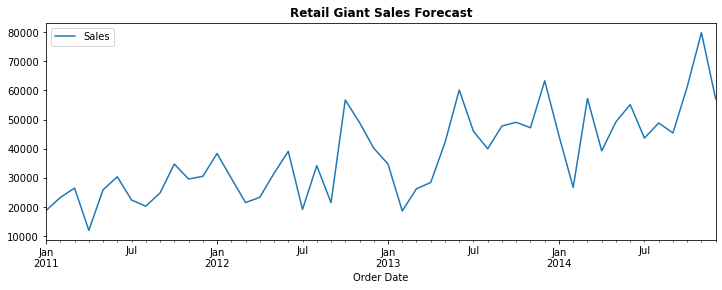

In [431]:
# Stationarity vs non-stationary time series
retailData['Sales'].plot(figsize=(12, 4))
plt.legend(loc='best')
plt.title('Retail Giant Sales Forecast', fontweight = 'bold')
plt.show(block=False)

#### Augmented Dickey-Fuller (ADF) test

- Null Hypothesis (H0): The series is not stationary (p−value > 0.05)
- Alternate Hypothesis (H1):  The series is stationary (p−value <= 0.05)

In [432]:
from statsmodels.tsa.stattools import adfuller
adf_test = adfuller(retailData['Sales'])

print('ADF Statistic: %f' % adf_test[0])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' % adf_test[1])

ADF Statistic: -3.376024
Critical Values @ 0.05: -2.93
p-value: 0.011804


#### Observation
- We can see that p-value is ~ 0.011, which is < 0.05
- So, series is stationary and we reject the null hypothesis

#### Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test

- Null Hypothesis (H0): The series is stationary (p−value > 0.05)
- Alternate Hypothesis (H1):  The series is not stationary (p−value <= 0.05)

In [433]:
from statsmodels.tsa.stattools import kpss
kpss_test = kpss(retailData['Sales'])

print('KPSS Statistic: %f' % kpss_test[0])
print('Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'])
print('p-value: %f' % kpss_test[1])

KPSS Statistic: 0.577076
Critical Values @ 0.05: 0.46
p-value: 0.024720


#### Observation
- We can see that p-value is 0.02472, which is < 0.05
- So, series is not stationary and we fail to reject the null hypothesis

##### There are two tools to convert a non-stationary series into stationary series are as follows:
- Transformation
- Differencing

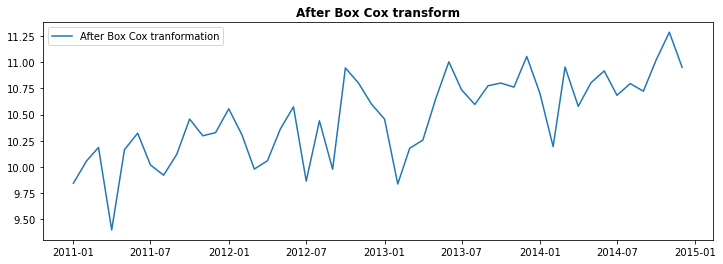

In [434]:
# Box Cox transformation to make variance constant
from scipy.stats import boxcox
data_boxcox = pd.Series(boxcox(retailData['Sales'], lmbda=0), index = retailData.index)

plt.figure(figsize=(12,4))
plt.plot(data_boxcox, label='After Box Cox tranformation')
plt.legend(loc='best')
plt.title('After Box Cox transform', fontweight= 'bold')
plt.show()

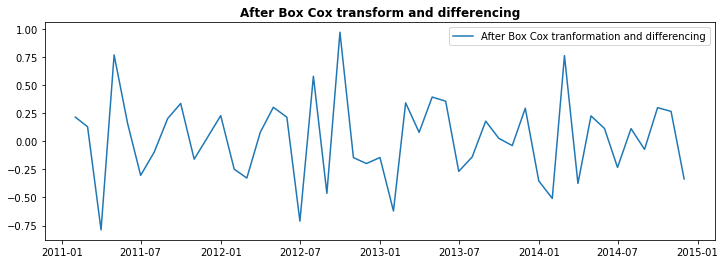

In [435]:
# Differencing is performed by subtracting the previous observation from the current observation.
# Differencing can remove both Trend and seasonality in a Time series.

data_boxcox_diff = pd.Series(data_boxcox - data_boxcox.shift(), retailData.index)
plt.figure(figsize=(12,4))
plt.plot(data_boxcox_diff, label='After Box Cox tranformation and differencing')
plt.legend(loc='best')
plt.title('After Box Cox transform and differencing', fontweight='bold')
plt.show()

#### Observations:
- The series appears Stationary
- The fluctuations are under constant limits of -0.8 to 1.0
- The mean is also centered around 0

In [436]:
data_boxcox_diff.dropna(inplace=True)

In [437]:
data_boxcox_diff.tail()

Order Date
2014-08-01    0.112012
2014-09-01   -0.072673
2014-10-01    0.298459
2014-11-01    0.265449
2014-12-01   -0.335151
dtype: float64

In [438]:
# Augmented Dickey-Fuller (ADF) test
adf_test = adfuller(data_boxcox_diff)

print('ADF Statistic: %f' % adf_test[0])
print('Critical Values @ 0.05: %.2f' % adf_test[4]['5%'])
print('p-value: %f' % adf_test[1])

ADF Statistic: -4.535011
Critical Values @ 0.05: -2.95
p-value: 0.000170


#### Observation: The p-value is 0.00017 < 0.05. So, the series is stationary.

In [439]:
# Kwiatkowski-Phillips-Schmidt-Shin (KPSS) test
kpss_test = kpss(data_boxcox_diff)

print('KPSS Statistic: %f' % kpss_test[0])
print('Critical Values @ 0.05: %.2f' % kpss_test[3]['5%'])
print('p-value: %f' % kpss_test[1])

KPSS Statistic: 0.156456
Critical Values @ 0.05: 0.46
p-value: 0.100000


#### Observation: Here the p-value is 0.1 > 0.05, implying that the series is stationary.

In [440]:
train_data_boxcox = data_boxcox[:train_len]
test_data_boxcox = data_boxcox[train_len:]
train_data_boxcox_diff = data_boxcox_diff[:train_len-1]
test_data_boxcox_diff = data_boxcox_diff[train_len-1:]

#### Auto regression method (AR)

In [441]:
from statsmodels.tsa.arima_model import ARIMA
model = ARIMA(train_data_boxcox_diff, order=(1,0,0)) # p,d,q
model_fit = model.fit()
print(model_fit.params)

const      0.024255
ar.L1.y   -0.406729
dtype: float64


In [442]:
y_hat_ar = data_boxcox_diff.copy()
y_hat_ar['ar_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox_diff'].cumsum()
y_hat_ar['ar_forecast_boxcox'] = y_hat_ar['ar_forecast_boxcox'].add(data_boxcox[0])
y_hat_ar['ar_forecast'] = np.exp(y_hat_ar['ar_forecast_boxcox'])

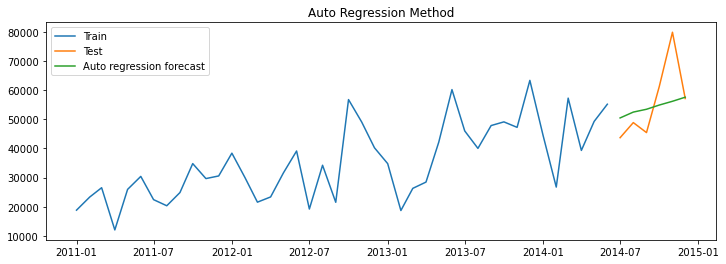

In [443]:
# Plot train, test and forecast
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_ar['ar_forecast'][test.index.min():], label='Auto regression forecast')
plt.legend(loc='best')
plt.title('Auto Regression Method')
plt.show()

In [444]:
# Calculate RMSE and MAPE
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_ar['ar_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_ar['ar_forecast'][test.index.min():])/test['Sales'])*100,2)
tempResults = pd.DataFrame({'Method':['(AR) Auto Regressive method'], 'RMSE': [rmse],'MAPE': [mape]})
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47
0,Simple average method,24146.06,34.34
0,Simple moving average forecast,14756.73,15.82
0,Simple exponential smoothing forecast,14627.34,15.74
0,Holt's exponential smoothing method,18976.37,34.57
0,Holt Winters' additive method,9306.82,10.17
0,Holt Winters' multiplicative method,9423.23,11.43
0,(AR) Auto Regressive method,10985.28,13.56


#### Moving average method (MA)

In [445]:
model = ARIMA(train_data_boxcox_diff, order=(0,0,1)) # p,d,q
model_fit = model.fit()
print(model_fit.params)

const      0.021415
ma.L1.y   -1.000000
dtype: float64


In [446]:
y_hat_ma = data_boxcox_diff.copy()
y_hat_ma['ma_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox_diff'].cumsum()
y_hat_ma['ma_forecast_boxcox'] = y_hat_ma['ma_forecast_boxcox'].add(data_boxcox[0])
y_hat_ma['ma_forecast'] = np.exp(y_hat_ma['ma_forecast_boxcox'])

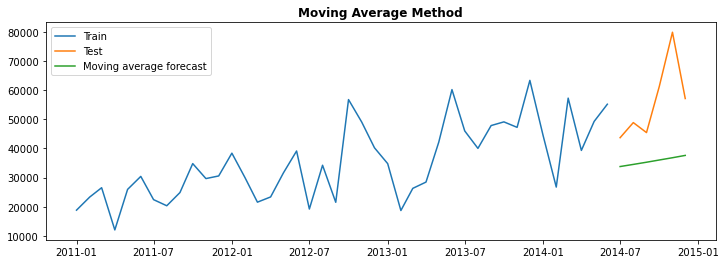

In [447]:
# Plot train, test and forecast
plt.figure(figsize=(12,4))
plt.plot(retailData['Sales'][:train_len], label='Train')
plt.plot(retailData['Sales'][train_len:], label='Test')
plt.plot(y_hat_ma['ma_forecast'][test.index.min():], label='Moving average forecast')
plt.legend(loc='best')
plt.title('Moving Average Method', fontweight='bold')
plt.show()

In [448]:
# Calculate RMSE and MAPE
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_ma['ma_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_ma['ma_forecast'][test.index.min():])/test['Sales'])*100,2)
tempResults = pd.DataFrame({'Method':['(MA) Moving Average method'], 'RMSE': [rmse],'MAPE': [mape]})
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47
0,Simple average method,24146.06,34.34
0,Simple moving average forecast,14756.73,15.82
0,Simple exponential smoothing forecast,14627.34,15.74
0,Holt's exponential smoothing method,18976.37,34.57
0,Holt Winters' additive method,9306.82,10.17
0,Holt Winters' multiplicative method,9423.23,11.43
0,(AR) Auto Regressive method,10985.28,13.56
0,(MA) Moving Average method,23360.02,33.93


#### Auto regression moving average method (ARMA)

In [449]:
model = ARIMA(train_data_boxcox_diff, order=(1,0,1)) # p,d,q
model_fit = model.fit()
print(model_fit.params)

const      0.02147
ar.L1.y    0.07458
ma.L1.y   -1.00000
dtype: float64


In [450]:
y_hat_arma = data_boxcox_diff.copy()
y_hat_arma['arma_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox_diff'].cumsum()
y_hat_arma['arma_forecast_boxcox'] = y_hat_arma['arma_forecast_boxcox'].add(data_boxcox[0])
y_hat_arma['arma_forecast'] = np.exp(y_hat_arma['arma_forecast_boxcox'])

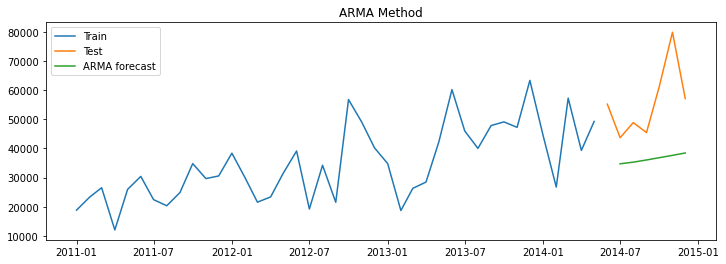

In [451]:
# Plot train, test and forecast
plt.figure(figsize=(12,4))
plt.plot(retailData['Sales'][:train_len-1], label='Train')
plt.plot(retailData['Sales'][train_len-1:], label='Test')
plt.plot(y_hat_arma['arma_forecast'][test.index.min():], label='ARMA forecast')
plt.legend(loc='best')
plt.title('ARMA Method')
plt.show()

In [452]:
# Calculate RMSE and MAPE
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_arma['arma_forecast'][train_len-1:])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_arma['arma_forecast'][train_len-1:])/test['Sales'])*100,2)
tempResults = pd.DataFrame({'Method':['(ARMA) Auto Regressive MA method'], 'RMSE': [rmse],'MAPE': [mape]})
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47
0,Simple average method,24146.06,34.34
0,Simple moving average forecast,14756.73,15.82
0,Simple exponential smoothing forecast,14627.34,15.74
0,Holt's exponential smoothing method,18976.37,34.57
0,Holt Winters' additive method,9306.82,10.17
0,Holt Winters' multiplicative method,9423.23,11.43
0,(AR) Auto Regressive method,10985.28,13.56
0,(MA) Moving Average method,23360.02,33.93
0,(ARMA) Auto Regressive MA method,22654.32,32.40


#### Auto regressive integrated moving average (ARIMA)

In [453]:
model = ARIMA(train_data_boxcox, order=(1,1,1)) # p,d,q
model_fit = model.fit()
print(model_fit.params)

const        0.02147
ar.L1.D.y    0.07458
ma.L1.D.y   -1.00000
dtype: float64


In [454]:
y_hat_arima = data_boxcox_diff.copy()
y_hat_arima['arima_forecast_boxcox_diff'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox_diff'].cumsum()
y_hat_arima['arima_forecast_boxcox'] = y_hat_arima['arima_forecast_boxcox'].add(data_boxcox[0])
y_hat_arima['arima_forecast'] = np.exp(y_hat_arima['arima_forecast_boxcox'])

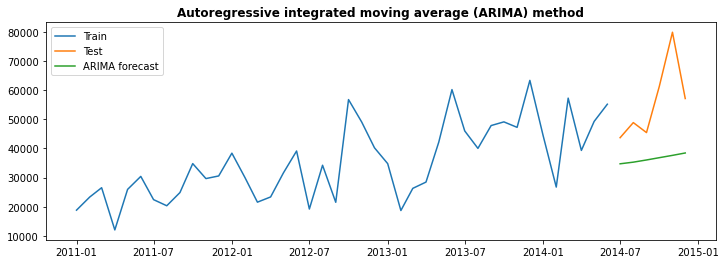

In [455]:
# Plot train, test and forecast
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_arima['arima_forecast'][test.index.min():], label='ARIMA forecast')
plt.legend(loc='best')
plt.title('Autoregressive integrated moving average (ARIMA) method', fontweight='bold')
plt.show()

In [456]:
# Calculate RMSE and MAPE
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_arima['arima_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_arima['arima_forecast'][test.index.min():])/test['Sales'])*100,2)
tempResults = pd.DataFrame({'Method':['(ARIMA) AR Integrated MA method'], 'RMSE': [rmse],'MAPE': [mape]})
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47
0,Simple average method,24146.06,34.34
0,Simple moving average forecast,14756.73,15.82
0,Simple exponential smoothing forecast,14627.34,15.74
0,Holt's exponential smoothing method,18976.37,34.57
0,Holt Winters' additive method,9306.82,10.17
0,Holt Winters' multiplicative method,9423.23,11.43
0,(AR) Auto Regressive method,10985.28,13.56
0,(MA) Moving Average method,23360.02,33.93
0,(ARMA) Auto Regressive MA method,22654.32,32.40


#### Seasonal auto regressive integrated moving average (SARIMA)

In [457]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(train_data_boxcox, order=(1,1,1), seasonal_order=(1,1,1,12)) 
model_fit = model.fit()
print(model_fit.params)

ar.L1      -0.041851
ma.L1      -0.996000
ar.S.L12    0.099125
ma.S.L12   -0.957885
sigma2      0.059078
dtype: float64


In [458]:
y_hat_sarima = data_boxcox_diff.copy()
y_hat_sarima['sarima_forecast_boxcox'] = model_fit.predict(data_boxcox_diff.index.min(), data_boxcox_diff.index.max())
y_hat_sarima['sarima_forecast'] = np.exp(y_hat_sarima['sarima_forecast_boxcox'])

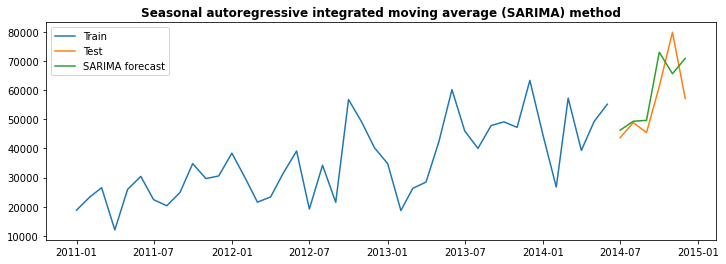

In [459]:
# Plot train, test and forecast
plt.figure(figsize=(12,4))
plt.plot(train['Sales'], label='Train')
plt.plot(test['Sales'], label='Test')
plt.plot(y_hat_sarima['sarima_forecast'][test.index.min():], label='SARIMA forecast')
plt.legend(loc='best')
plt.title('Seasonal autoregressive integrated moving average (SARIMA) method', fontweight='bold')
plt.show()

In [460]:
# Calculate RMSE and MAPE
rmse = np.sqrt(mean_squared_error(test['Sales'], y_hat_sarima['sarima_forecast'][test.index.min():])).round(2)
mape = np.round(np.mean(np.abs(test['Sales']-y_hat_sarima['sarima_forecast'][test.index.min():])/test['Sales'])*100,2)
tempResults = pd.DataFrame({'Method':['(SARIMA) Seasonal AR Integrated MA method'], 'RMSE': [rmse],'MAPE': [mape]})
results = pd.concat([results, tempResults])
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,12355.97,17.47
0,Simple average method,24146.06,34.34
0,Simple moving average forecast,14756.73,15.82
0,Simple exponential smoothing forecast,14627.34,15.74
0,Holt's exponential smoothing method,18976.37,34.57
0,Holt Winters' additive method,9306.82,10.17
0,Holt Winters' multiplicative method,9423.23,11.43
0,(AR) Auto Regressive method,10985.28,13.56
0,(MA) Moving Average method,23360.02,33.93
0,(ARMA) Auto Regressive MA method,22654.32,32.40


## Conclusion

#### "Holt Winters additive method" is the best forecasting method in the smoothing technique.

#### "SARIMA - Seasonal Auto Regressive Integrated Moving Average" is the best method in ARIMA set of techniques.